In [1]:
import os
import cv2 as cv
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential , load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from keras.applications import ResNet50 , ResNet101, ResNet152

In [10]:
# 한글 깨짐 방지
# plt.rc('font', family='AppleGothic') 
# plt.rcParams['axes.unicode_minus'] = False 
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

In [ ]:
###################################################### 실행 안함. 자동완성용

from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils import to_categorical
######################################################

In [146]:
folder_list = os.listdir('/Users/goflv/workspace/ai_service/ai/team_project/dobae_git/wallpaperDefect/proj1/open/train')
# folder_list.remove('.DS_Store') 

data = []
pic_count = []

for folder_name in folder_list:
    folder_path = '/Users/goflv/workspace/ai_service/ai/team_project/dobae_git/wallpaperDefect/proj1/open/train/' + folder_name

    image_list = os.listdir(folder_path)
    list_len = len(image_list)
    pic_count.append(list_len)

    for image_name in image_list:
        image_path = folder_path +'/' + image_name
        img_array = np.fromfile(image_path, np.uint8)
        img = cv.imdecode(img_array, cv.IMREAD_COLOR)
        resize = cv.resize(img, (400,400), interpolation=cv.INTER_CUBIC)
        blur = cv.bilateralFilter(resize, 10,75,75)
        gray = cv.cvtColor(blur, cv.COLOR_BGR2GRAY)
        threshold, thresh = cv.threshold(gray,150, 255, cv.THRESH_BINARY)
        data.append(gray)
        
answer = []
for idx, nm in enumerate(folder_list):
        answer += [nm] * pic_count[idx]

Text(0.5, 1.0, '훼손')

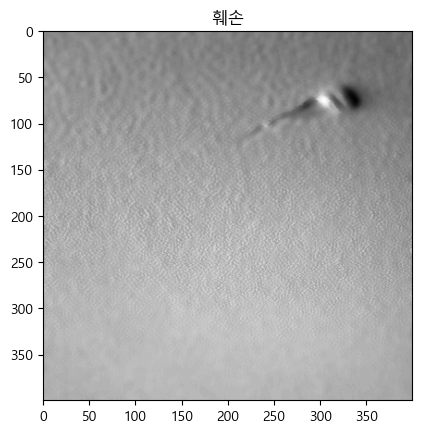

In [147]:
num=2348
plt.imshow(data[num], cmap='gray')
plt.title(answer[num])

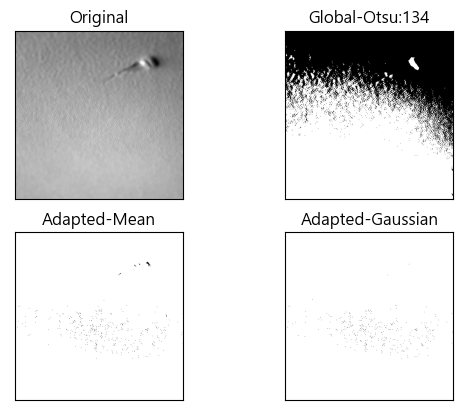

In [148]:
img=data[num]
ret, th1 = cv.threshold(img, 0, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)
th2 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C,\
                                      cv.THRESH_BINARY, blk_size, C)
th3 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, \
                                     cv.THRESH_BINARY, blk_size, C)
# blur = cv.bilateralFilter(img, 10,75,75)
# threshold, thresh = cv.threshold(blur,150, 255, cv.THRESH_BINARY)

imgs = {'Original': img, 'Global-Otsu:%d'%ret:th1, \
        'Adapted-Mean':th2, 'Adapted-Gaussian': th3}
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2,2,i+1)
    plt.title(k)
    plt.imshow(v,'gray')
    plt.xticks([]),plt.yticks([])

In [214]:
def img_show(folder_name, image_name):
    folder_path = '/Users/goflv/workspace/ai_service/ai/team_project/dobae_git/wallpaperDefect/proj1/open/train/'
    image_path = folder_path +'/' + folder_name +'/' + image_name
    img_array = np.fromfile(image_path, np.uint8)
    global img
    img = cv.imdecode(img_array, cv.IMREAD_COLOR)
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    plt.title(folder_name+', '+image_name)
    plt.imshow(img,'gray')

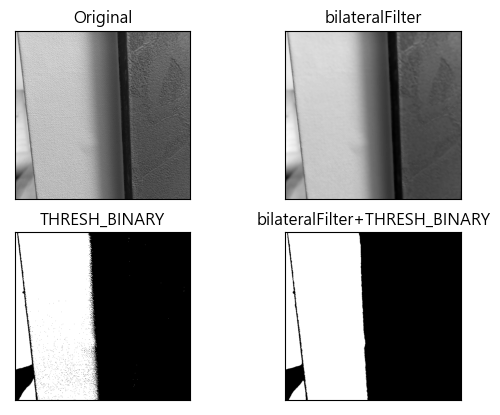

In [228]:
img_show('면불량','86.png')

blur = cv.bilateralFilter(img, 10,30,30)
threshold1, thresh1 = cv.threshold(img,150, 255, cv.THRESH_BINARY)
threshold2, thresh2 = cv.threshold(blur,150, 255, cv.THRESH_BINARY)

imgs = {'Original': img, 'bilateralFilter':blur,
       'THRESH_BINARY': thresh1, 'bilateralFilter+THRESH_BINARY':thresh2}
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2,2,i+1)
    plt.title(k)
    plt.imshow(v,'gray')
    plt.xticks([]),plt.yticks([])

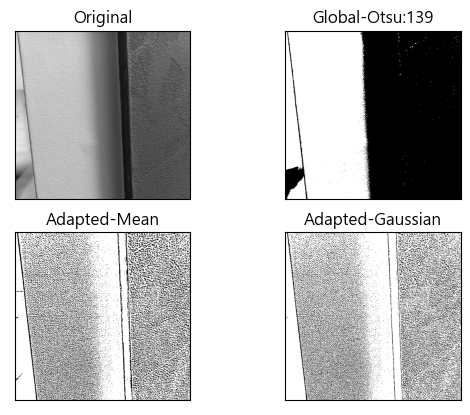

In [229]:
img_show('면불량','86.png')

ret, th1 = cv.threshold(img, 0, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)
th2 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C,\
                                      cv.THRESH_BINARY, blk_size, C)
th3 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, \
                                     cv.THRESH_BINARY, blk_size, C)
# blur = cv.bilateralFilter(img, 10,75,75)
# threshold, thresh = cv.threshold(blur,150, 255, cv.THRESH_BINARY)

imgs = {'Original': img, 'Global-Otsu:%d'%ret:th1, \
        'Adapted-Mean':th2, 'Adapted-Gaussian': th3}
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2,2,i+1)
    plt.title(k)
    plt.imshow(v,'gray')
    plt.xticks([]),plt.yticks([])

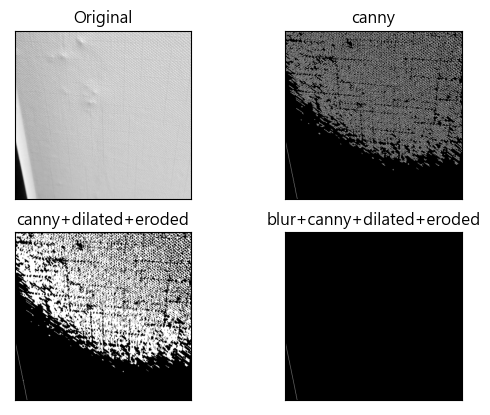

In [225]:
img_show('면불량','89.png')


blur = cv.bilateralFilter(img, 10,30,30)
canny1 = cv.Canny(img, 50, 100)
canny2 = cv.Canny(blur, 50, 100)
dilated1 = cv.dilate(canny1, (7, 7), iterations=3)
eroded1 = cv.erode(dilated1, (7, 7), iterations=3)
dilated2 = cv.dilate(canny2, (7, 7), iterations=3)
eroded2 = cv.erode(dilated2, (7, 7), iterations=3)



imgs = {'Original': img, 'canny':canny1,
       'canny+dilated+eroded':eroded1, 'blur+canny+dilated+eroded':eroded2}
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2,2,i+1)
    plt.title(k)
    plt.imshow(v,'gray')
    plt.xticks([]),plt.yticks([])

In [ ]:
# 음영감 높이고 Adapted Gaussian 시도
# 그레이스케일로 해야하는가? 녹오염 판별

In [ ]:
# 다음 과제: open cv 를 이용하여 사진을 전처리한 후 원본 사진과 비교해 가면서 문제가 되는 지점이 제일 잘 보이는 전처리를 찾고 그것을 반영해보자
# 아니면 전처리할 경우에 포스트 잇 아예 제거하는 방법을 찾아보자